<a href="https://colab.research.google.com/github/Mayroseant/Marketing-Campaign-for-Banking-Products/blob/master/Marketing_Campaign_for_Banking_Products_Mayrose_Antony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MARKETING CAMPAIGN FOR BANKING PRODUCTS

Dataset provided : 
https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

### Problem Statement

Creating a Machine Learning model to predict the likelihood of a liability customer buying personal loans from the bank thereby enhancing the marketing campaign of the bank.

Machine Learning Algorithms used : We will be using Classification Machine Learning Algorithms to the dataset as the end outcome is categorical value (Yes/No).

## STEP 1

### 1.1 Importing the Libraries

In [1]:
import pandas as pd                     # for data manipulation
import numpy as np                      # for scientific computing
import matplotlib.pyplot as plt         # for plotting graphs
import seaborn as sns                   # data visualization
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2 Importing the Dataset

The dataset is an excel sheet with two sheets - Description and Data. Lets explore both.

Mounting the Google Drive onto Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


####Description of the dataset

In [3]:
description = pd.read_excel("drive/My Drive/Bank_Personal_Loan_Modelling.xlsx", "Description")

In [4]:
description

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


Dropping the NaN cells in the description

In [5]:
description.drop('Unnamed: 0', axis = 1, inplace = True)
description.drop(index = [0, 1, 2, 3, 4, 5], axis = 0, inplace = True)
description.rename(columns = {'Unnamed: 1':'Name', 'Unnamed: 2':'Description'}, inplace = True)

In [6]:
pd.set_option('display.max_colwidth', -1)
description

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Name,Description
6,ID,Customer ID
7,Age,Customer's age in completed years
8,Experience,#years of professional experience
9,Income,Annual income of the customer ($000)
10,ZIPCode,Home Address ZIP code.
11,Family,Family size of the customer
12,CCAvg,Avg. spending on credit cards per month ($000)
13,Education,Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
14,Mortgage,Value of house mortgage if any. ($000)
15,Personal Loan,Did this customer accept the personal loan offered in the last campaign?


The dataset contains 14 columns (including the target variable 'Personal Loan').
Let's explore each of the coulmns and their relationship with the target variable.

#### Data of the Dataset

In [7]:
dataset = pd.read_excel("drive/My Drive/Bank_Personal_Loan_Modelling.xlsx", "Data")

In [8]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


The dataset contains 5000 rows and 14 columns

### 1.3 Datatype of each columns in the dataset

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We found out that there are no missing values and the corresponding datatypes of each columns.

### 1.4 Statistical summary of the dataset

In [11]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


ID column has noisy datapoints and has to be dropped as it has no role in finding the target variable (It's some random value assigned to a customer).<br>
Experience column has a negative min value and thus contains faulty data. It has to be modified.<br>
Income, ZIP Code, CCAvg and Mortgage also require certain modifications. 

### 1.5 Shape of dataset (Dimensions)

In [12]:
dataset.shape

(5000, 14)

### 1.6 Checking if there are any missing values in the dataset

In [13]:
dataset.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

There are no null or missing values.

## STEP 2

### Data Cleaning

In [14]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Dropping ID column as it is irrelevant in the study

In [15]:
dataset = dataset.drop("ID", axis = 1)

Finding the correlation between Age and Experience

In [16]:
experience = dataset["Experience"]
age = dataset["Age"]
correlation = experience.corr(age)
correlation

0.9942148569683321

There is a high correlation between Age and Experience - we need to drop one of the two. Since Experinece column already contains faulty data (as observed earlier), we prefer to drop the Experince attribute.

In [17]:
dataset = dataset.drop("Experience", axis = 1)

In [18]:
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


## STEP 3

##Exploratory Data Analysis (EDA)

### 3.1 Unique Values in each column

In [19]:
listItem = []
for col in dataset.columns :
    listItem.append([col,
                     dataset[col].dtype,
                     dataset[col].nunique(),
                     list(dataset[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns = ['Features', 'DataType', 'Unique', 'UniqueSample'],
                     data = listItem)
dfDesc

,Features,DataType,Unique,UniqueSample
0,Age,int64,45,"[25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46, 55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62, 58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23]"
1,Income,int64,162,"[49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105, 114, 40, 112, 130, 193, 21, 25, 63, 62, 43, 152, 83, 158, 48, 119, 35, 41, 18, 50, 121, 71, 141, 80, 84, 60, 132, 104, 52, 194, 8, 131, 190, 44, 139, 93, 188, 39, 125, 32, 20, 115, 69, 85, 135, 12, 133, 19, 82, 109, 42, 78, 51, 113, 118, 64, 161, 94, 15, 74, 30, 38, 9, 92, 61, 73, 70, 149, 98, 128, 31, 58, 54, 124, 163, 24, 79, 134, 23, 13, 138, 171, 168, 65, 10, 148, 159, 169, 144, 165, ...]"
2,ZIP Code,int64,467,"[91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023, 94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604, 94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117, 94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019, 95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245, 95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123, 90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305, 95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612, 95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037, 95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833, 94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720, 90840, ...]"
3,Family,int64,4,"[4, 3, 1, 2]"
4,CCAvg,float64,108,"[1.6, 1.5, 1.0, 2.7, 0.4, 0.3, 0.6, 8.9, 2.4, 0.1, 3.8, 2.5, 2.0, 4.7, 8.1, 0.5, 0.9, 1.2, 0.7, 3.9, 0.2, 2.2, 3.3, 1.8, 2.9, 1.4, 5.0, 2.3, 1.1, 5.7, 4.5, 2.1, 8.0, 1.7, 0.0, 2.8, 3.5, 4.0, 2.6, 1.3, 5.6, 5.2, 3.0, 4.6, 3.6, 7.2, 1.75, 7.4, 2.6666666666666665, 7.5, 6.5, 7.8, 7.9, 4.1, 1.9, 4.3, 6.8, 5.1, 3.1, 0.8, 3.7, 6.2, 0.75, 2.3333333333333335, 4.9, 0.6666666666666666, 3.2, 5.5, 6.9, 4.333333333333333, 7.3, 4.2, 4.4, 6.1, 6.333333333333333, 6.6, 5.3, 3.4, 7.0, 6.3, 8.3, 6.0, 1.6666666666666667, 8.6, 7.6, 6.4, 10.0, 5.9, 5.4, 8.8, 1.3333333333333333, 9.0, 6.7, 4.25, 6.666666666666667, 5.8, 4.8, 3.25, 5.666666666666667, 8.5, ...]"
5,Education,int64,3,"[1, 2, 3]"
6,Mortgage,int64,347,"[0, 155, 104, 134, 111, 260, 163, 159, 97, 122, 193, 198, 285, 412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236, 166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135, 244, 164, 81, 315, 140, 95, 89, 90, 105, 100, 282, 209, 249, 91, 98, 145, 150, 169, 280, 99, 78, 264, 113, 117, 325, 121, 138, 77, 158, 109, 131, 391, 88, 129, 196, 617, 123, 167, 190, 248, 82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220, 133, 182, 290, 125, 124, 224, 141, 119, 139, ...]"
7,Personal Loan,int64,2,"[0, 1]"
8,Securities Account,int64,2,"[1, 0]"
9,CD Account,int64,2,"[0, 1]"


There are a lot unique values in ZIP Code and it will affect the model if it is applied to Encoding techniques to change its nominal value to ordinal value. Therefore, it is better to drop the column as it may not be related to the target variable.

In [20]:
dataset = dataset.drop("ZIP Code", axis = 1)

In [21]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### 3.2 Number of people with Zero Mortgage

In [22]:
sum(map(lambda i: i == 0, dataset["Mortgage"]))

3462

### 3.3 Number of People with zero Credit Card spending per month (CCAvg)

In [23]:
sum(map(lambda i: i == 0, dataset["CCAvg"]))

106

### 3.4 Value counts of all categorical columns

From the unique values, it is clear that the categorical attributes are Family, Education, Securities Account, CD Account, Online, CreditCard and Personal Loan.

In [24]:
col = dataset[['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']]
for i in col:
  print(dataset.groupby(i).size())
  print("\n")

Family
1    1472
2    1296
3    1010
4    1222
dtype: int64


Education
1    2096
2    1403
3    1501
dtype: int64


Securities Account
0    4478
1    522 
dtype: int64


CD Account
0    4698
1    302 
dtype: int64


Online
0    2016
1    2984
dtype: int64


CreditCard
0    3530
1    1470
dtype: int64


Personal Loan
0    4520
1    480 
dtype: int64




Here, we realize that target variable value count is uneven. There are more number of people who did not choose a Personal Loan. Therefore, while splitting the dataset into train and test set, stratified splitting is required.

### 3.5.1 Univariate Analysis

Age

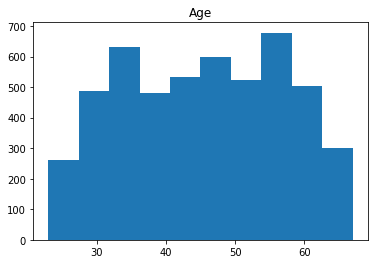

In [25]:
plt.hist(dataset['Age'])
plt.title("Age")
plt.show()

Age has a normal distribution and hence does not require modifications.

Income

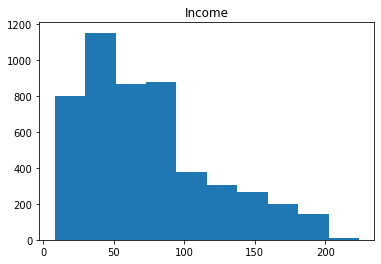

In [26]:
plt.hist(dataset['Income'])
plt.title("Income")
plt.show()

Income has a positive skewed distribution and requires modifications.

Family

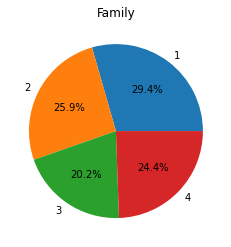

In [27]:
tmp = pd.DataFrame(dataset.groupby('Family').size().reset_index())
tmp.columns = ['Family', 'Count']

plt.title("Family")
plt.pie(tmp['Count'], labels = ['1', '2', '3', '4'] , autopct = '%1.1f%%')
plt.show()

CCAvg

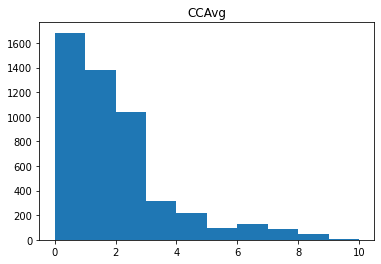

In [28]:
plt.hist(dataset['CCAvg'])
plt.title("CCAvg")
plt.show()

CCAvg also requires modifications as it gives a skewed distribution.

Education

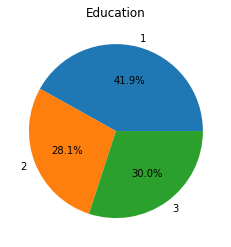

In [29]:
tmp = pd.DataFrame(dataset.groupby('Education').size().reset_index())
tmp.columns = ['Education', 'Count']

plt.title("Education")
plt.pie(tmp['Count'], labels = ['1', '2', '3'] , autopct = '%1.1f%%')
plt.show()

Mortgage

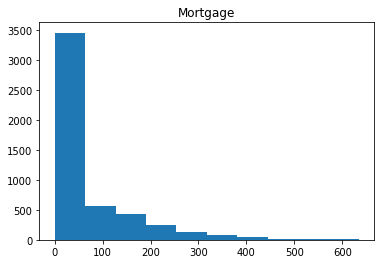

In [30]:
plt.hist(dataset['Mortgage'])
plt.title("Mortgage")
plt.show()

Mortgage also requires modifications as it gives a skewed distribution.

Securities Account, CD Account, Online, CreditCard, Personal Loan

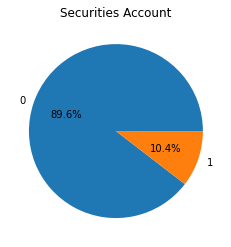

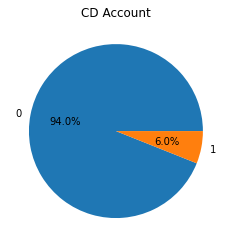

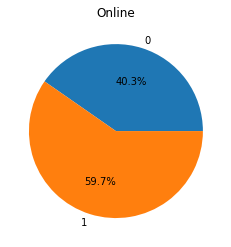

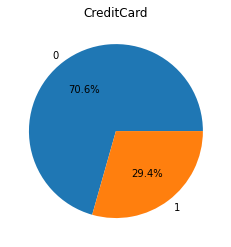

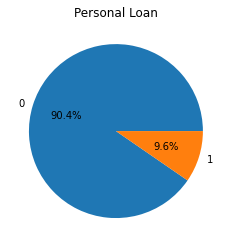

In [31]:
for i in ['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']:
  tmp = pd.DataFrame(dataset.groupby(i).size().reset_index())
  tmp.columns = [i, 'Count']
  
  plt.title(i)
  plt.pie(tmp['Count'], labels = ['0','1'] , autopct = '%1.1f%%')
  plt.show()

From the pie charts, it can be concluded that the dataset contains few customers buying Personal Loans.

### 3.5.2 Multivariate Analysis

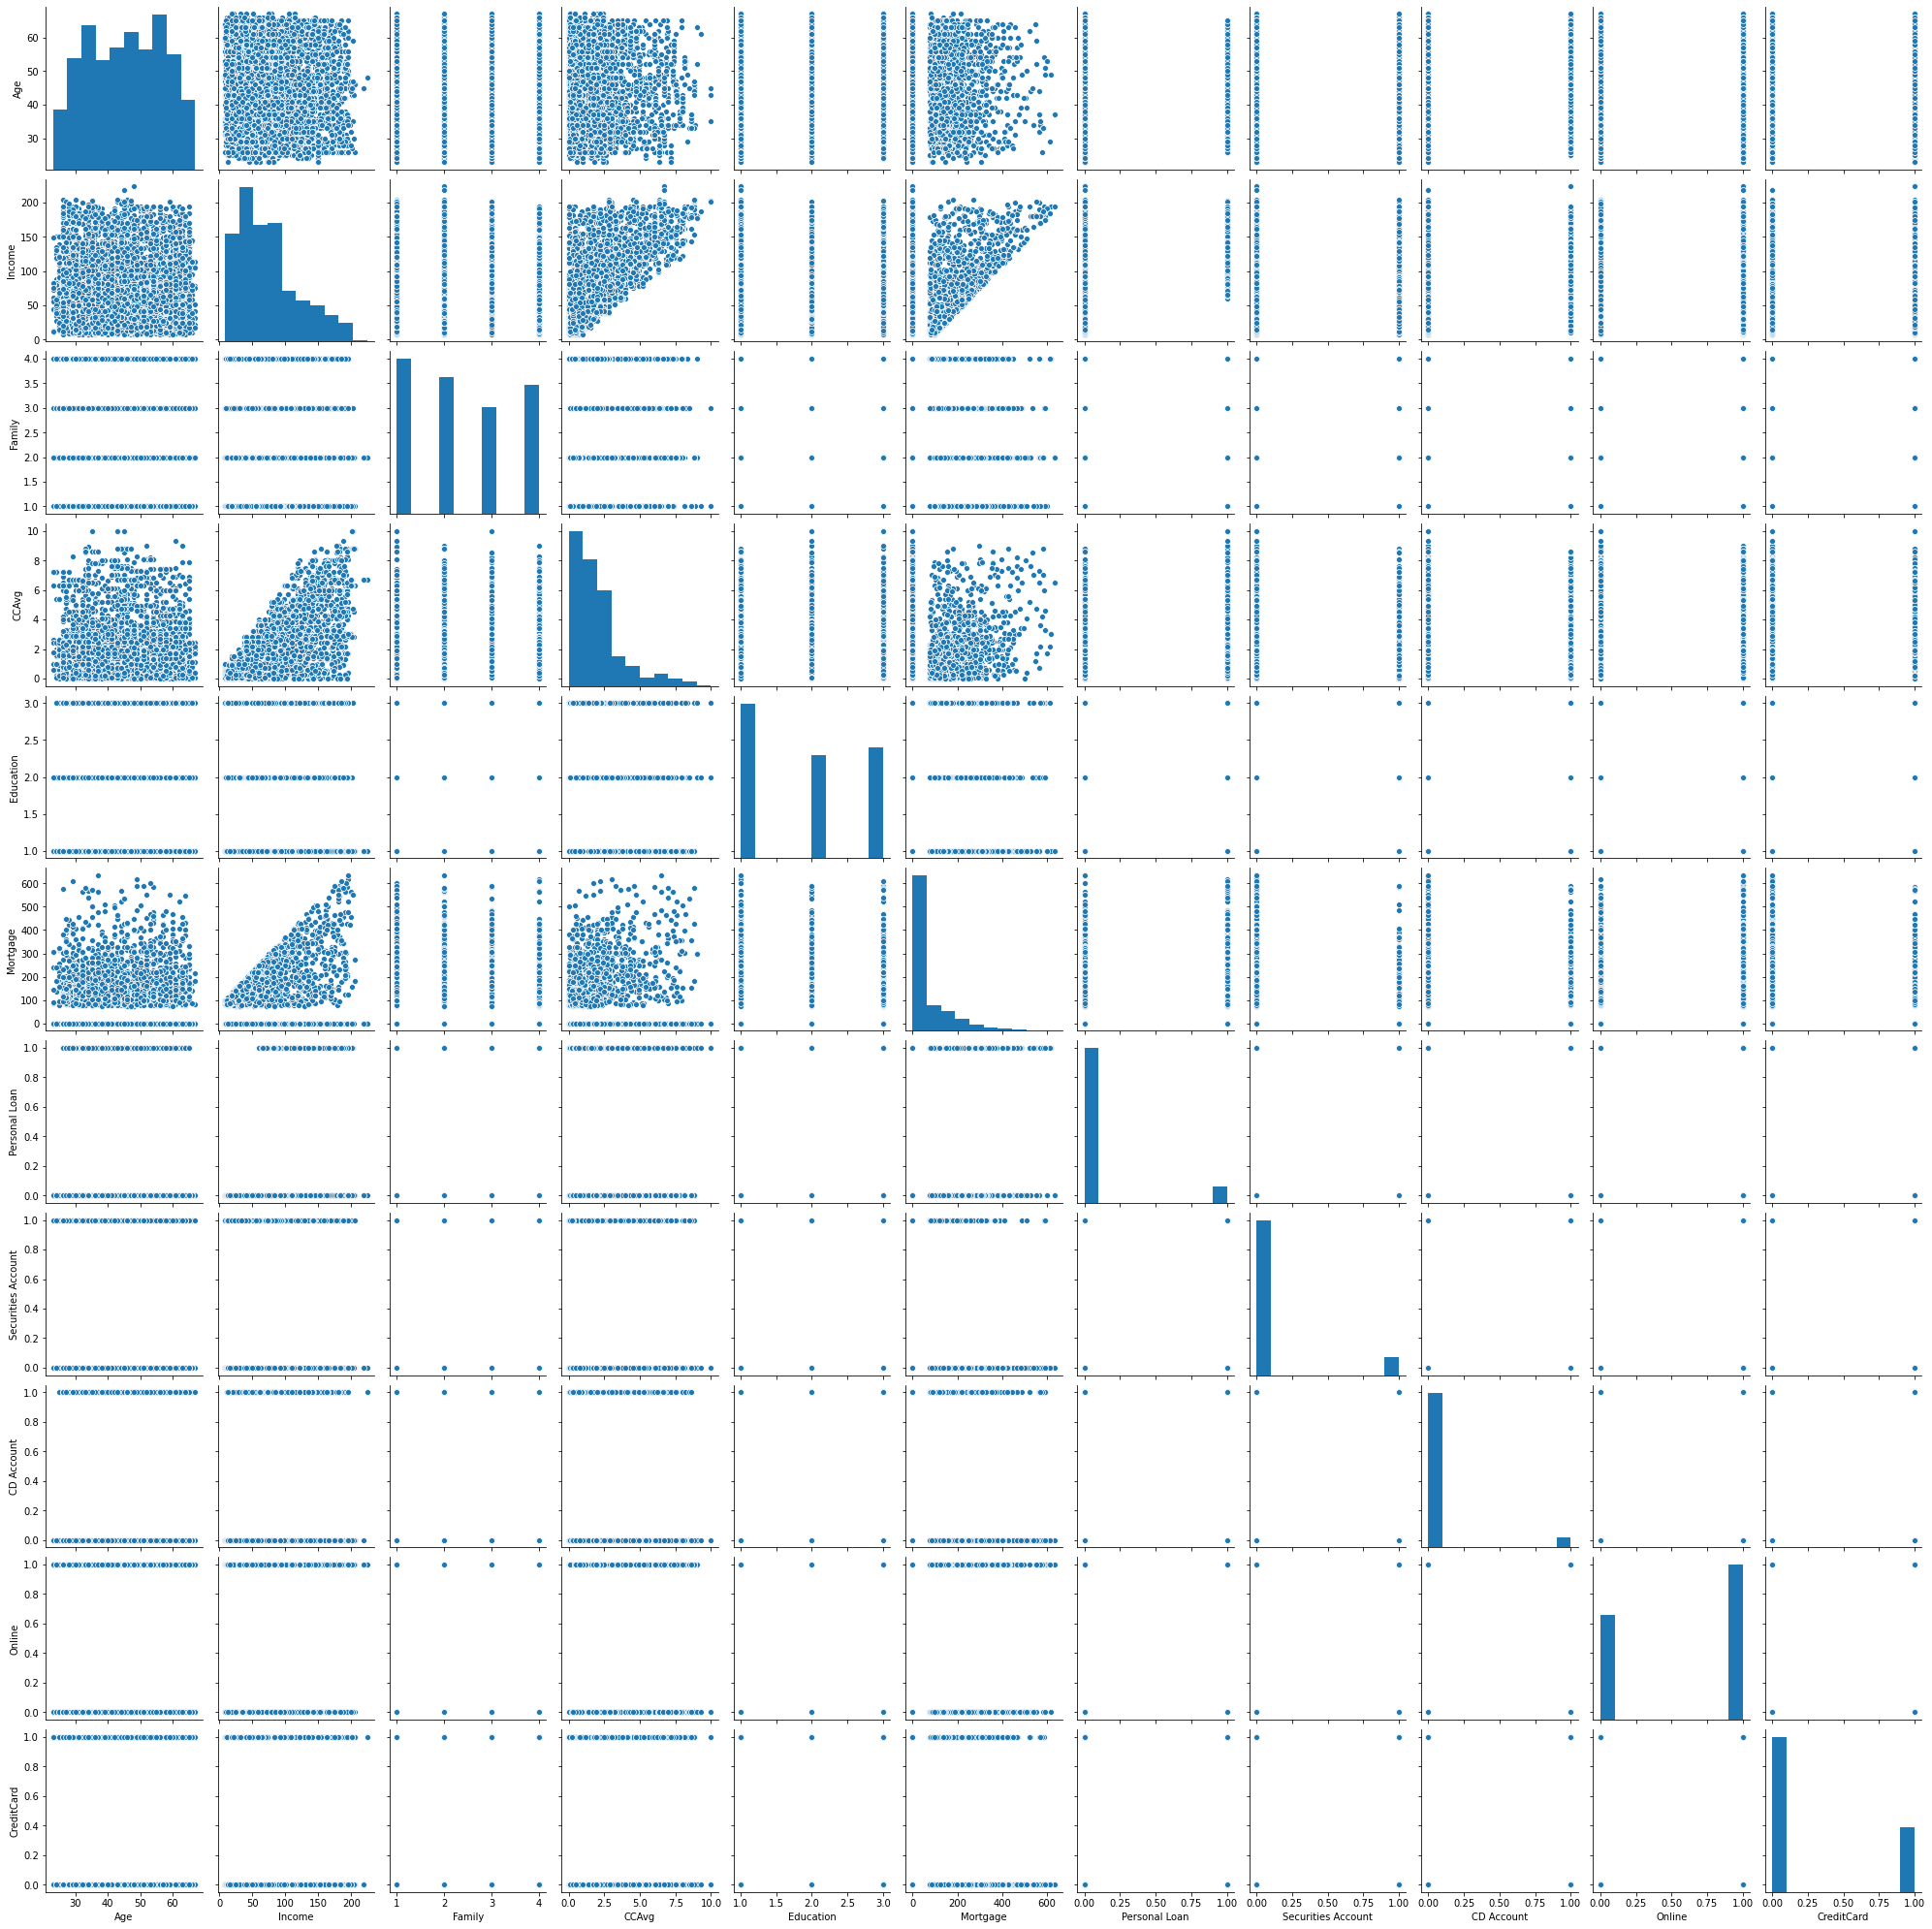

In [32]:
sns.pairplot(dataset.iloc[:,0:])

&bull;Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.<br>
&bull;Income is positively skewed. Majority of the customers have income between 45K and 55K.<br>
&bull;CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.<br>
&bull;Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

Relationship between Age and Personal Loan

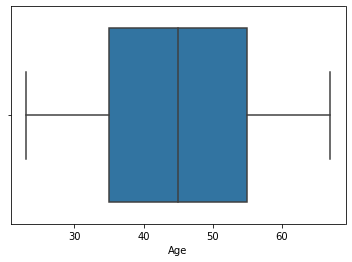

In [33]:
sns.boxplot(x = "Age", data = dataset, hue = "Personal Loan")

Majority of customers falling between 30 years and 60 years of age.

Relationship between Education and Income

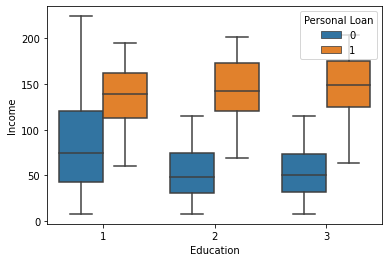

In [34]:
sns.boxplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data = dataset)

It seems the Customers whose Education level is 1 is having more income. But customers who go for Personal Loan have the same Income distribution regardless of the Education level.

Relationship between Education and Mortgage

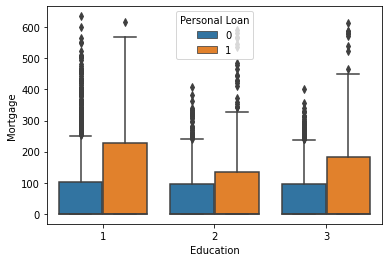

In [35]:
sns.boxplot(x = "Education", y = 'Mortgage', hue = "Personal Loan", data = dataset)

Customer who do not have Personal Loan and Customer who has Personal Loan have high Mortgage

Relationship between Securities Account and Personal Loan

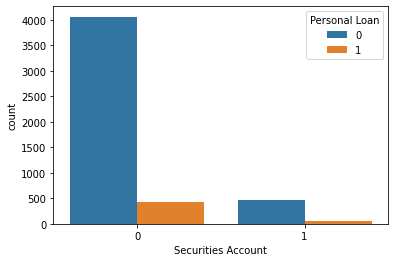

In [36]:
sns.countplot(x = "Securities Account", data = dataset, hue = "Personal Loan")

Majority of Customers who does not have Personal Loan have Securities Account.

Relationship between Family and Personal Loan

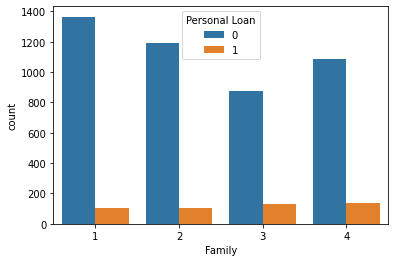

In [37]:
sns.countplot(x = 'Family', data = dataset, hue = 'Personal Loan')

Family size does not have any impact in Personal Loan. But it seems Families with size of 3 are more likely to take Personal Loan. When considering future campaign this might be good association.

Relationship between Credit Card and Personal Loan

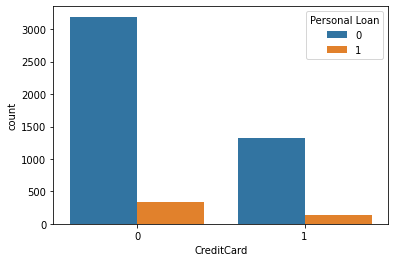

In [38]:
sns.countplot(x = 'CreditCard', data = dataset, hue = 'Personal Loan')

The Customer who uses or doesn’t use a Credit Card doesn’t seem to affect the probability of buying a Personal Loan.

Relationship between CD Account and Personal Loan

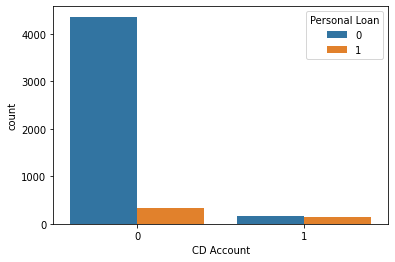

In [39]:
sns.countplot(x = 'CD Account', data = dataset, hue = 'Personal Loan')

Customers who does not have CD Account, does not have Personal Loan as well. This seems to be majority. But almost all customers who has CD Account has Personal Loan as well.

Relationship between CCAvg and Personal Loan

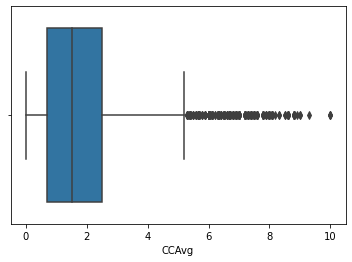

In [40]:
sns.boxplot(x = 'CCAvg', data = dataset, hue = 'Personal Loan')

Average spending is between 0K to 10K and majority spends less than 2.5K.

Relationship between Online and Personal Loan

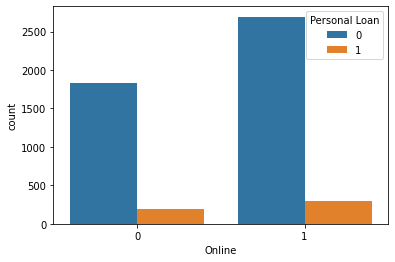

In [41]:
sns.countplot(x = 'Online', data = dataset, hue = 'Personal Loan')

Online Transactions of the Customer do not affect Personal Loans.

Correlation between Features using HeatMap

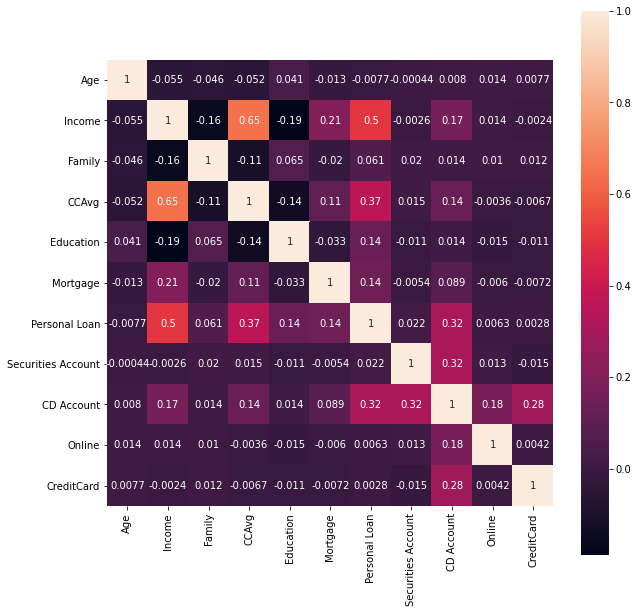

In [42]:
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.corr(), annot = True, square = True)

Income and CCAvg are moderately correlated.

## STEP 4

## Transformations on the Dataset

As concluded earlier, the features Income, CCAvg and Mortgage are to be transformed.

Transformation on Income

In [43]:
from sklearn import preprocessing

#PowerTransformer - yeo-johnson
power_transform = preprocessing.PowerTransformer(method = 'yeo-johnson', standardize = False)
dataset['Income'] = power_transform.fit_transform(dataset['Income'].values.reshape(-1, 1))

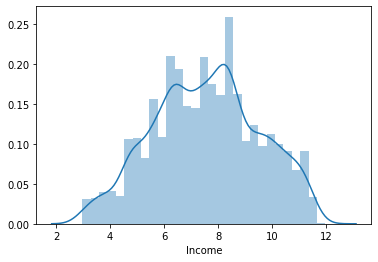

In [44]:
sns.distplot(dataset['Income'])

In [45]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,4,1.6,1,0,0,1,0,0,0
1,45,5.876952,3,1.5,1,0,0,1,0,0,0
2,39,3.504287,1,1.0,1,0,0,0,0,0,0
3,35,8.983393,1,2.7,2,0,0,0,0,0,0
4,35,6.597314,4,1.0,2,0,0,0,0,0,1


Transformation on CCAvg

In [46]:
#PowerTransformer - yeo-johnson
power_transform = preprocessing.PowerTransformer(method = 'yeo-johnson', standardize = False)
dataset['CCAvg'] = power_transform.fit_transform(dataset['CCAvg'].values.reshape(-1, 1))

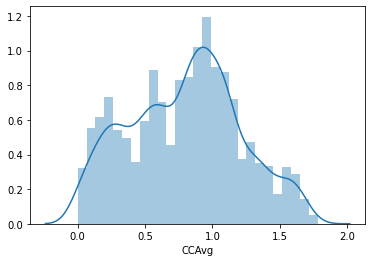

In [47]:
sns.distplot(dataset['CCAvg'])

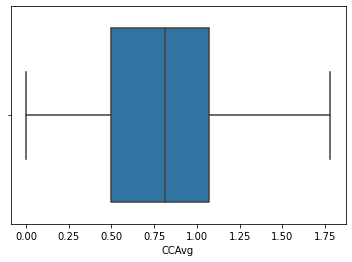

In [48]:
sns.boxplot(x = 'CCAvg', hue = 'Personal Loan', data = dataset)

No more outliers in the feature

In [49]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,4,0.845150,1,0,0,1,0,0,0
1,45,5.876952,3,0.814468,1,0,0,1,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,0,0,1


Both Income and CCAvg are transformed using PowerTransformer - yeo-johnson.

Transformation of Mortgage

In [50]:
dataset["Mortgage"] = pd.cut(dataset['Mortgage'],
                              bins = [0, 100, 200, 300, 400, 500, 600, 700], 
                              labels = [0, 1, 2, 3, 4, 5, 6],
                              include_lowest = True)

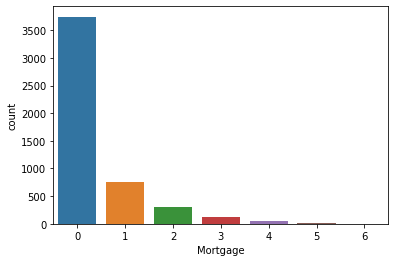

In [51]:
sns.countplot(dataset['Mortgage'])

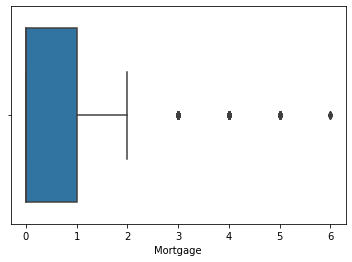

In [52]:
sns.boxplot(x = 'Mortgage', hue = 'Personal Loan', data = dataset)

In [53]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,4,0.845150,1,0,0,1,0,0,0
1,45,5.876952,3,0.814468,1,0,0,1,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,0,0,1


Mortgage has been converted to categorical data using binning.

## STEP 5

## Splitting the Dataset into Train and Test Sets (70:30, Stratified splitting)

In [54]:
features = dataset.drop("Personal Loan", axis=1)       # independent variables - X
target = dataset["Personal Loan"]                      # dependent variable - y

In [55]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state = 0, 
                                                    stratify = target)

## STEP 6

## Logistic Regression

Importing libraries

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [57]:
logreg = LogisticRegression(random_state = 0)

#fitting the model
logreg.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## STEP 7

## Evaluation Metrics for the Model's Performance

Accuracy of Train set

In [58]:
#predicting with train set
pred_train_X = logreg.predict(train_X)
acc_train_X = metrics.accuracy_score(train_y, pred_train_X)
print(round(acc_train_X*100, 1), "%")

95.4 %


Accuracy of Test set

In [59]:
#predicting with test set
pred_test_X = logreg.predict(test_X)
logreg_acc = metrics.accuracy_score(test_y, pred_test_X)
print(round(logreg_acc*100, 1), "%")

94.8 %


Confusion Matrix

In [60]:
print(metrics.confusion_matrix(test_y, pred_test_X))

[[1331   25]
 [  53   91]]


Recall, Precision, F1

In [61]:
from sklearn.metrics import classification_report
logreg_report = classification_report(test_y, pred_test_X)
print(logreg_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.63      0.70       144

    accuracy                           0.95      1500
   macro avg       0.87      0.81      0.84      1500
weighted avg       0.94      0.95      0.95      1500



ROC AUC Score

In [62]:
logreg_roc = metrics.roc_auc_score(test_y, pred_test_X)
logreg_roc

0.8067539331366764

## STEP 8

## Other Classification Algorithms

### Naiive Bayes Classification

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
naive_model = GaussianNB()

#fitting the model
naive_model.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy of Train set

In [65]:
#predicting with train set
pred_train_X = naive_model.predict(train_X)
acc_train_X = metrics.accuracy_score(train_y, pred_train_X)
print(round(acc_train_X*100, 1), "%")

90.9 %


Accuracy of Test set

In [66]:
#predicting with test set
pred_test_X = naive_model.predict(test_X)
naive_acc = metrics.accuracy_score(test_y, pred_test_X)
print(round(naive_acc*100, 1), "%")

91.3 %


Confusion Matrix

In [67]:
print(metrics.confusion_matrix(test_y, pred_test_X))

[[1293   63]
 [  67   77]]


Recall, Precision, F1

In [68]:
from sklearn.metrics import classification_report
naive_report = classification_report(test_y, pred_test_X)
print(naive_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.55      0.53      0.54       144

    accuracy                           0.91      1500
   macro avg       0.75      0.74      0.75      1500
weighted avg       0.91      0.91      0.91      1500



ROC AUC Score

In [69]:
naive_roc = metrics.roc_auc_score(test_y, pred_test_X)
naive_roc

0.7441310226155359

### Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 0)

#fitting the model
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Accuracy of Train set

In [72]:
#predicting with train set
pred_train_X = dt_model.predict(train_X)
acc_train_X = metrics.accuracy_score(train_y, pred_train_X)
print(round(acc_train_X*100, 1), "%")

99.5 %


Accuracy of Test set

In [73]:
#predicting with test set
pred_test_X = dt_model.predict(test_X)
dt_acc = metrics.accuracy_score(test_y, pred_test_X)
print(round(dt_acc*100, 1), "%")

97.8 %


Confusion Matrix

In [74]:
print(metrics.confusion_matrix(test_y, pred_test_X))

[[1338   18]
 [  15  129]]


Recall, Precision, F1

In [75]:
from sklearn.metrics import classification_report
dt_report = classification_report(test_y, pred_test_X)
print(dt_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.90      0.89       144

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



ROC AUC Score

In [76]:
dt_roc = metrics.roc_auc_score(test_y, pred_test_X)
dt_roc

0.9412794985250739

### Support Vector Machines

In [77]:
from sklearn.svm import SVC

In [78]:
clf = SVC(kernel = 'linear')

#fitting the model
clf.fit(train_X,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy of Train set

In [79]:
#predicting with train set
pred_train_X = clf.predict(train_X)
acc_train_X = metrics.accuracy_score(train_y, pred_train_X)
print(round(acc_train_X*100, 1), "%")

95.6 %


Accuracy of Test set

In [80]:
#predicting with test set
pred_test_X = clf.predict(test_X)
svm_acc = metrics.accuracy_score(test_y, pred_test_X)
print(round(svm_acc*100, 1), "%")

95.6 %


Confusion Matrix

In [81]:
print(metrics.confusion_matrix(test_y, pred_test_X))

[[1344   12]
 [  54   90]]


Recall, Precision, F1

In [82]:
from sklearn.metrics import classification_report
svm_report = classification_report(test_y, pred_test_X)
print(svm_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.88      0.62      0.73       144

    accuracy                           0.96      1500
   macro avg       0.92      0.81      0.85      1500
weighted avg       0.95      0.96      0.95      1500



ROC AUC Score

In [83]:
svm_roc = metrics.roc_auc_score(test_y, pred_test_X)
svm_roc

0.808075221238938

### K Nearest Neighbours (KNN) Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')

#fitting the model
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Accuracy of Train set

In [86]:
#predicting with train set
pred_train_X = knn.predict(train_X)
acc_train_X = metrics.accuracy_score(train_y, pred_train_X)
print(round(acc_train_X*100, 1), "%")

97.1 %


Accuracy of Test set

In [87]:
#predicting with test set
pred_test_X = knn.predict(test_X)
knn_acc = metrics.accuracy_score(test_y, pred_test_X)
print(round(knn_acc*100, 1), "%")

96.0 %


Confusion Matrix

In [88]:
print(metrics.confusion_matrix(test_y, pred_test_X))

[[1346   10]
 [  50   94]]


Recall, Precision, F1

In [89]:
from sklearn.metrics import classification_report
knn_report = classification_report(test_y, pred_test_X)
print(knn_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.90      0.65      0.76       144

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



ROC AUC Score

In [90]:
knn_roc = metrics.roc_auc_score(test_y, pred_test_X)
knn_roc

0.8227015732546705

### Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier(n_estimators = 101, max_depth = 250, max_leaf_nodes = 50, random_state = 101)

#fitting the model
rfc.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=250, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

Accuracy of Train set

In [93]:
#predicting with train set
pred_train_X = rfc.predict(train_X)
acc_train_X = metrics.accuracy_score(train_y, pred_train_X)
print(round(acc_train_X*100, 1), "%")

99.4 %


Accuracy of Test set

In [94]:
#predicting with test set
pred_test_X = rfc.predict(test_X)
rfc_acc = metrics.accuracy_score(test_y, pred_test_X)
print(round(rfc_acc*100, 1), "%")

98.7 %


Confusion Matrix

In [95]:
print(metrics.confusion_matrix(test_y, pred_test_X))

[[1354    2]
 [  18  126]]


Recall, Precision, F1

In [96]:
from sklearn.metrics import classification_report
rfc_report = classification_report(test_y, pred_test_X)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



ROC AUC Score

In [97]:
rfc_roc = metrics.roc_auc_score(test_y, pred_test_X)
rfc_roc

0.9367625368731564

### Neural Networks

In [98]:
from sklearn.neural_network import MLPClassifier

In [99]:
clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5, 2), random_state = 1)

#fitting the model
clf.fit(train_X, train_y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Accuracy of Train Set

In [100]:
pred_train_X = clf.predict(train_X)
acc_train_X = metrics.accuracy_score(train_y, pred_train_X)
print(round(acc_train_X*100, 1), "%")

90.4 %


Accuracy of Test Set

In [101]:
pred_test_X = clf.predict(test_X)
nn_acc = metrics.accuracy_score(test_y, pred_test_X)
print(round(nn_acc*100, 1), "%")

90.4 %


Confusion Matrix

In [102]:
print(metrics.confusion_matrix(test_y, pred_test_X))

[[1356    0]
 [ 144    0]]


Recall, Precision, F1

In [103]:
from sklearn.metrics import classification_report
nn_report = classification_report(test_y, pred_test_X)
print(nn_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       0.00      0.00      0.00       144

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.82      0.90      0.86      1500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC Score

In [104]:
nn_roc = metrics.roc_auc_score(test_y, pred_test_X)
nn_roc

0.5

## STEP 9

## Business Understandings

### Model Comparison

Accuracy Comparison

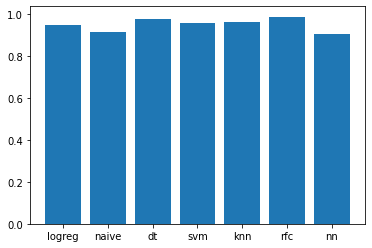

In [105]:
lst = [logreg_acc, naive_acc, dt_acc, svm_acc, knn_acc, rfc_acc, nn_acc]
index = ['logreg', 'naive', 'dt', 'svm', 'knn', 'rfc', 'nn']
plt.bar(index, lst)
plt.show()

ROC Comparison

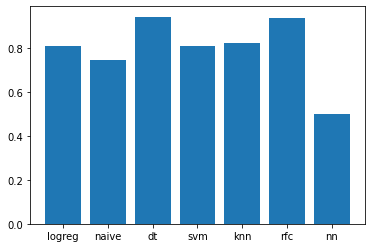

In [106]:
lst = [logreg_roc, naive_roc, dt_roc, svm_roc, knn_roc, rfc_roc, nn_roc]
index = ['logreg', 'naive', 'dt', 'svm', 'knn', 'rfc', 'nn']
plt.bar(index, lst)
plt.show()

From both the plots, it is understood that Decision Tree Classifier and Random Forest Classifier are better algorithms than the others in this dataset.

Accuracy:
Decision Tree Classifier: 97.8 % <br>
Random Forest Classifier: 98.7 %

### Conclusion

In the dataset:<br>
&bull; <b>ID</b> of a customer is a random allotted number and does not affect the Personal Loan.<br>
&bull; <b>Age</b> does not affect Personal Loan. Majority of customers falling between 30 years and 60 years of age.<br>
&bull; Customers whose <b>Education</b> level is 1 (Undergraduate) is having more income. But customers who go for Personal Loan have the same <b>Income</b> distribution regardless of the Education level.<br>
&bull; <b>CCAvg</b> (average spending) is between 0K to 10K and majority spends less than 2.5K.<br>
&bull; <b>ZIP Code</b> had many levels and thus was not a relevant feature for <b>Personal Loan</b><br>
&bull; <b>Experience</b> is highly correlated to Income and was dropped from the dataset to avoid multicollinearity.<br>
&bull; <b>Mortgage</b> 70% of the individuals have a mortgage of less than 40K. However the max value is 635K. Customer who do not have Personal Loan and Customer who has Personal Loan have high Mortgage.<br>
&bull; Majority of Customers who does not have Personal Loan have <b>Securities Account</b>.<br>
&bull; <b>Family</b> size does not have any impact in Personal Loan. Families with size of 3 are more likely to take Personal Loan.<br>
&bull; The Customer who uses or doesn’t use a <b>Credit Card</b> doesn’t seem to affect the probability of buying a Personal Loan.<br>
&bull; Customers who does not have <b>CD Account</b>, does not have Personal Loan as well. This seems to be majority. But almost all customers who has CD Account has Personal Loan as well.<br>
&bull; <b>Online</b> Transactions of the Customer do not affect Personal Loans.

We can apply Decision Tree Classifier or Random Forest Classifier to the dataset to get better results on increasing the Bank's Marketing Campaign.

# Thank you!!